In [2]:
import matplotlib.pyplot as plt
import thinker
import thinker.util as util
import gym
import gym_sokoban
import vis_utils
import numpy as np

# Visualising Plans
This notebook allows for the inspection of the agent's internal plans. Specifically, it allows for:
- Inspecting aspects of the agent's internal plan-fomration process (Section 1)
- Inspecting the impact of interventions of the formation of the agent's internal plans (Section 2)

## 1 - Visualising The Agent's Planning Process

The code in this section allows for visualising various aspects of the agent's internal planning process as discussed in Section 5 and Appendix A. Functionality to visualise an agent's internal plan is as follows:
- `plan_type` is the type of internal plan to visualise. Can be either `agent` (to visualise plans in terms of Agent Approach Direction) or `box` (to visualise plans in terms of Box Push Direction).
- `checkpoint` is the agent checkpoint (i.e. number of training transitions) to visualise plans for. Set to `250` for the fully-trained DRC(3,3) agent, or `100` for DRC(1,9) and DRC(9,1) agents.
- `num_layers` is the number of layers the agent has. Set to `3` for DRC(3,3), `9` for DRC(9,1) or `1` to DRC(1,9).
- `num_ticks` is the number of internal ticks the agent has. Set to `3` for DRC(3,3), `1` for DRC(9,1) or `9` to DRC(1,9). This option does not matter for the ResNet agent.
- `resnet` is flag denoting whether the agent is a ResNet agent. If `True`, load resnet architecture, else DRC.
- `layer` is the layer to which probes will be applied to visualise plans.
- `level_id` is the level id to visualise the agent's plan over.
- `visualise_probs` is a flag to control whether to shade plans by probe confidence.


The aspects of the agent's internal planning process that are illustrated by levels are as follows:
- Evaluative planning (levels 0-5)
- Adaptive planning (levels 6-11)
- Forward planning (levels 12-17)
- Backward planning (levels 18-23)
- Parallel planning (levels 24-29)
- Blind planning (levels 30-34)
- Generalised planning (levels 35-39)
- Blocked-route planning (levels 40-44)
- New-route planning (levels 45-49)
- Iterative planning (levels 50-44)

In [7]:
# initate a new trajectory
plan_type = "box"
checkpoint = 250
num_layers = 3
num_ticks = 3
resnet = False
layer = 3
level_id = 27
visualise_probs = True
env, drc_net, rnn_state, env_out, probes, traj_info, flags = vis_utils.start_new_traj(
    plan_type=plan_type,
    model_name= f"{checkpoint}m" if (num_layers == 3 and num_ticks == 3 and not resnet) else (f"{checkpoint}m_d{num_layers}t{num_ticks}" if not resnet else f"{checkpoint}m_resnet_d{num_layers}"),
    level_id=level_id,
    num_layers=num_layers,
    num_ticks=num_ticks,
    layer=layer,
    resnet=resnet
)

/home/tom/mlmi/project/testrepo/experiments/sokoban_experiments/vis_utils.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  probe.load_state_dict(torch.load(f"./results/c

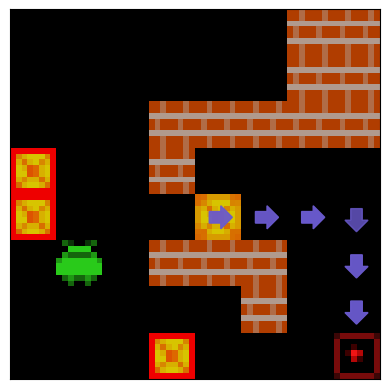

In [34]:
# take step in environment and visualise internal plan after final tick
rnn_state, env_out = vis_utils.take_step(
    env=env,
    net=drc_net,
    rnn_state=rnn_state,
    env_out=env_out,
    probes=probes,
    traj_info=traj_info,
    flags=flags,
    visualise=True,
    visualise_probs=visualise_probs
    )

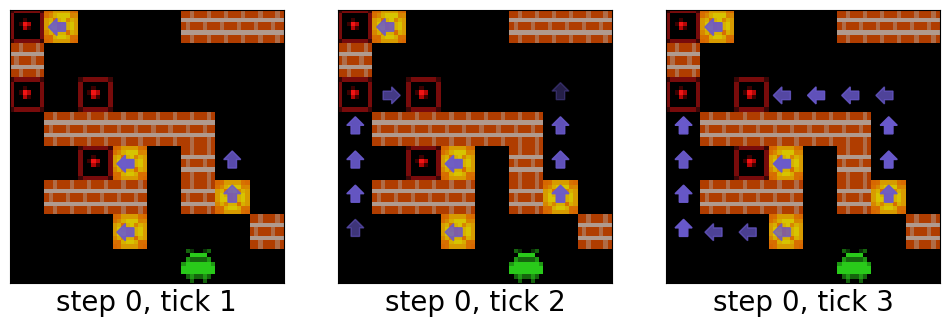

In [7]:
# visualise development of agent's internal plan over current trajectory.
# if visualise_all_ticks is set to True, visualise plan after all internal ticks; otherwise, visualise plan after final tick of each step.
vis_utils.visualise_plan(traj_info=traj_info, visualise_all_ticks=True, visualise_probs=True)

# Visualising The Effect of Intervention Experiments

The code in this section allows for visualising the effect of interventions on the agent's internal plan as discussed in Section 6.1 and Appendix B. Functionality is as follows:
- `interv_exp` is the intervention experiment to perform. Must be either `agent_shortcut`, `box_shortcut`, `cutoff`, `cutoff_agentonly` or `cutoff_boxonly`.
- `intervs` is the number of squares to intervene upon as part of the "long-route" intervention in Agent-Shortcut and Box-Shortcut levels.
- `noshortroute` controls whether or not to perform the short-route intervention in Agent-Shortcut and Box-Shortcut interventions.
- `plan_type` is the type of internal plan to visualise. Can be either `agent` (to visualise plans in terms of Agent Approach Direction) or `box` (to visualise plans in terms of Box Push Direction).
- `checkpoint` is the agent checkpoint (i.e. number of training transitions) to visualise plans for. Set to `250` for the fully-trained DRC(3,3) agent, or `100` for DRC(1,9) and DRC(9,1) agents.
- `num_layers` is the number of layers the agent has. Set to `3` for DRC(3,3), `9` for DRC(9,1) or `1` to DRC(1,9).
- `num_ticks` is the number of internal ticks the agent has. Set to `3` for DRC(3,3), `1` for DRC(9,1) or `9` to DRC(1,9). 
- `alpha` is the intervention strength of the intervention.
- `layer` is the layer to which probes will be applied to visualise plans.
- `level_id` is the level id to perform the intervention on. There are 200 levels for each intervention setting.
- `visualise_probs` is a flag to control whether to shade plans by probe confidence.

In [185]:
# initate a new intervention episode
interv_exp = "agent_shortcut"
plan_type = "agent"
checkpoint = 250
num_layers = 3
num_ticks = 3
layer = 3
level_id = 125
alpha = 1
intervs = 1
noshortroute= False
visualise_probs = True
env, drc_net, rnn_state, env_out, probes, traj_info, flags = vis_utils.start_new_interv_traj(
    interv_exp=interv_exp,
    plan_type=plan_type,
    level_id=level_id,
    model_name=f"{checkpoint}m" if (num_layers == 3 and num_ticks == 3) else f"{checkpoint}m_d{num_layers}t{num_ticks}",
    num_layers=num_layers,
    num_ticks=num_ticks,
    layer=layer,
    alpha=alpha,
    intervs=intervs,
    noshortroute=noshortroute
)


/home/tom/mlmi/project/testrepo/experiments/sokoban_experiments/vis_utils.py:174: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  probe.load_state_dict(torch.load(f"./results/

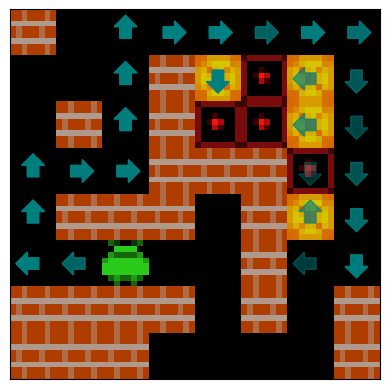

In [191]:
# take a step whilst performing intervention, and visualise agent's plan
rnn_state, env_out = vis_utils.take_interv_step(
    env=env,
    net=drc_net,
    rnn_state=rnn_state,
    env_out=env_out,
    probes=probes,
    traj_info=traj_info,
    flags=flags,
    visualise=True,
    visualise_probs=True
    )

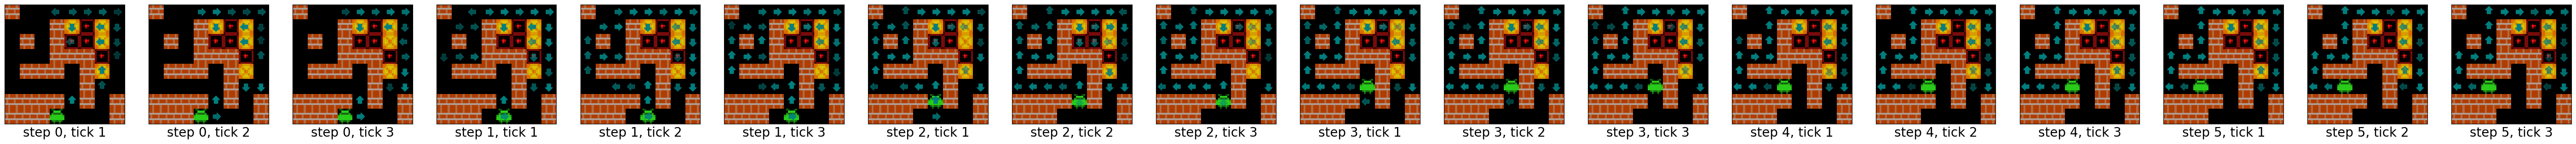

In [192]:
# visualise development of agent's internal plan over current trajectory.
# if visualise_all_ticks is set to True, visualise plan after all internal ticks; otherwise, visualise plan after final tick of each step.
vis_utils.visualise_plan(traj_info=traj_info, visualise_all_ticks=True, visualise_probs=True)